___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Statsmodels Time Series Excercises
For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [2]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('../Data/EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

/var/folders/_f/9d8x86lx1p1420f1rd65dkw40000gn/T/ipykernel_41590/749105214.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [3]:
# CODE HERE

df.index.freq = "MS"
print(df.index)

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')


In [2]:
# DON'T WRITE HERE

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2. Plot the dataset.

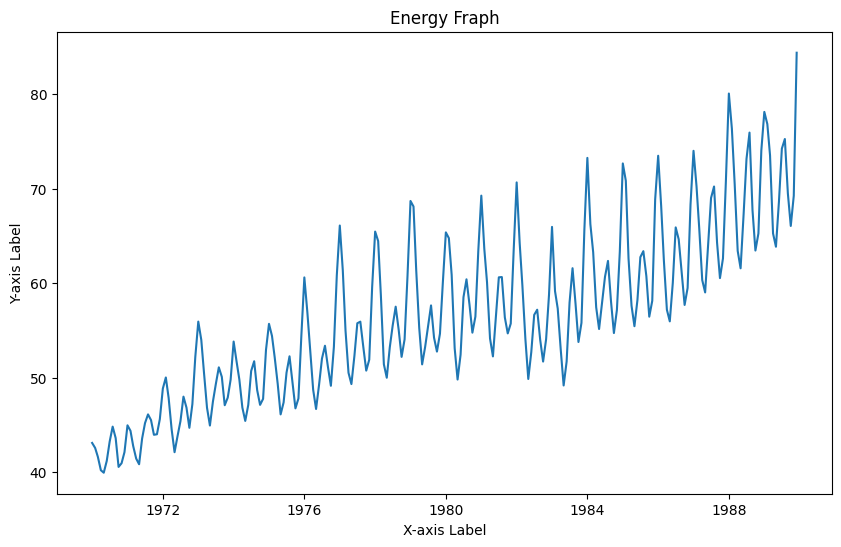

In [4]:
# CODE HERE
import matplotlib.pyplot as plt

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting three separate line graphs
plt.plot(df.index, df['EnergyIndex'])

# Adding labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Energy Fraph')

# Showing the plot
plt.show()

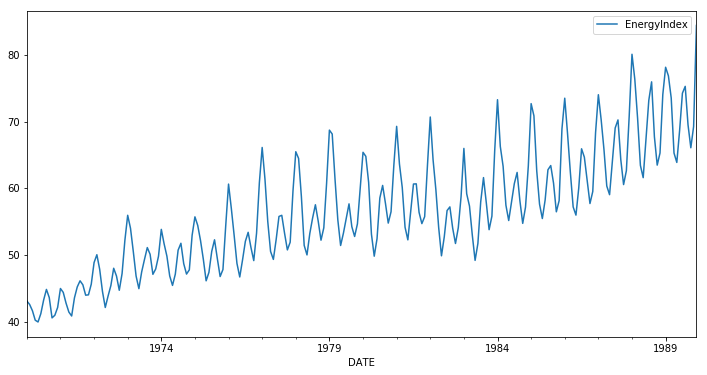

In [3]:
# DON'T WRITE HERE

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

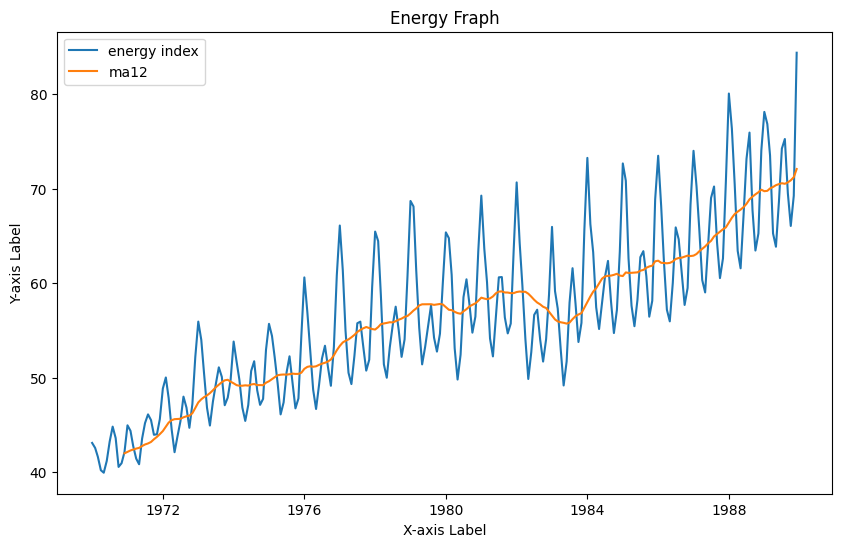

In [5]:
df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()

import matplotlib.pyplot as plt

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting three separate line graphs
plt.plot(df.index, df['EnergyIndex'], label="energy index")
plt.plot(df.index, df['SMA12'] , label="ma12")

# Adding labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Energy Fraph')

plt.legend()

# Showing the plot
plt.show()



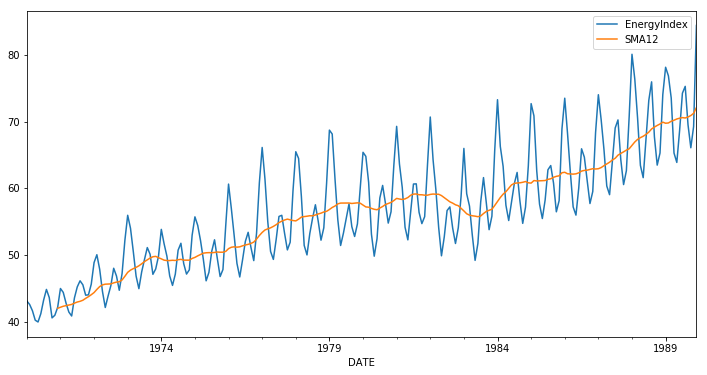

In [4]:
# DON'T WRITE HERE

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

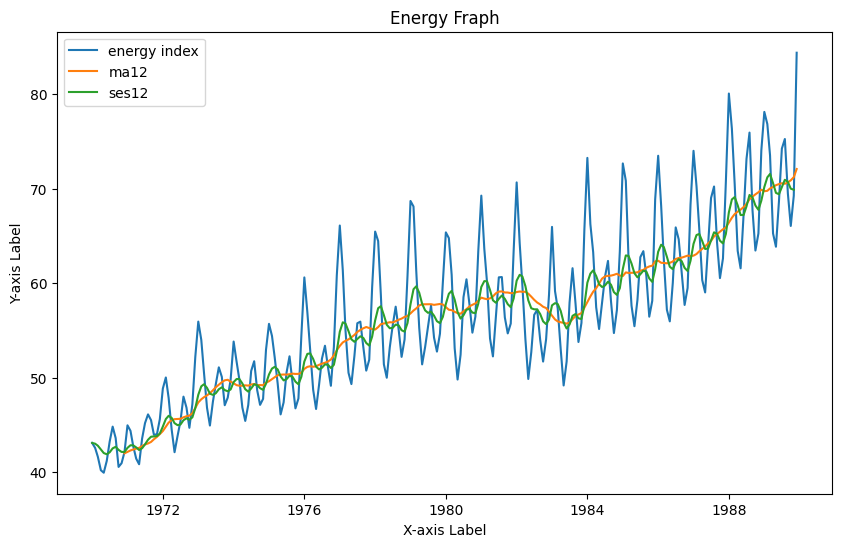

In [6]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

sesModel = SimpleExpSmoothing(df["EnergyIndex"]).fit(smoothing_level=2/(12+1),optimized=False)
df["ses12"]=sesModel.fittedvalues.shift(-1)

import matplotlib.pyplot as plt

# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting three separate line graphs
plt.plot(df.index, df['EnergyIndex'], label="energy index")
plt.plot(df.index, df['SMA12'] , label="ma12")
plt.plot(df.index, df['ses12'], label="ses12")

# Adding labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Energy Fraph')

plt.legend()

# Showing the plot
plt.show()



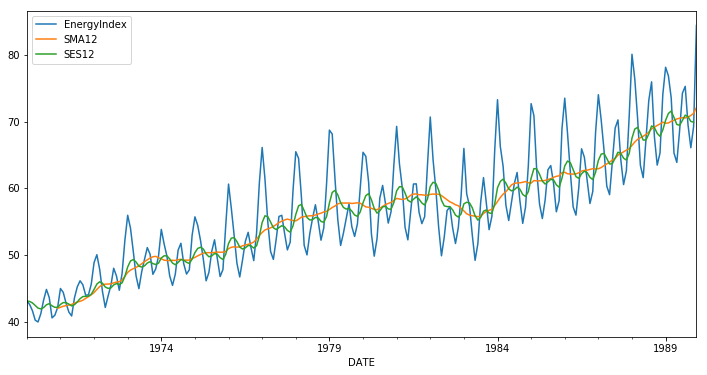

In [5]:
# DON'T WRITE HERE

### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

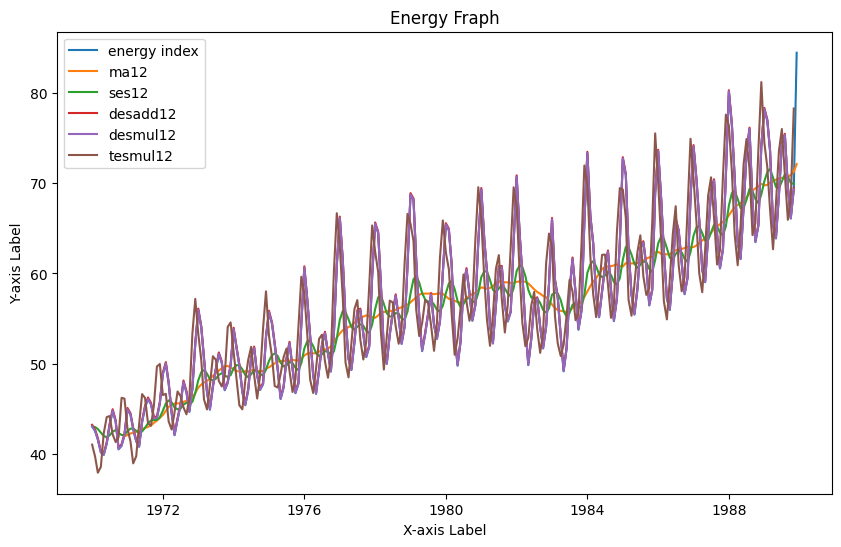

In [8]:
# DON'T FORGET TO PERFORM THE IMPORT!

from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df["EnergyIndex"], trend='add').fit().fittedvalues.shift(-1)
df['DESmul12'] = ExponentialSmoothing(df["EnergyIndex"], trend='mul').fit().fittedvalues.shift(-1)

df['TESmul12'] = ExponentialSmoothing(df["EnergyIndex"], trend='mul' , seasonal='mul' , seasonal_periods=12).fit().fittedvalues.shift(-1)


# Creating the plot
plt.figure(figsize=(10, 6))

# Plotting three separate line graphs
plt.plot(df.index, df['EnergyIndex'], label="energy index")
plt.plot(df.index, df['SMA12'] , label="ma12")
plt.plot(df.index, df['ses12'], label="ses12")
plt.plot(df.index, df['DESadd12'], label="desadd12")
plt.plot(df.index, df['DESmul12'], label="desmul12")


# Adding labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Energy Fraph')

plt.legend()

# Showing the plot
plt.show()



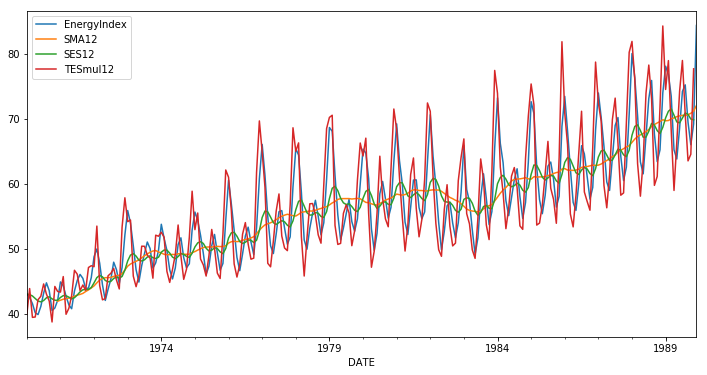

In [6]:
# DON'T WRITE HERE

### OPTIONAL: Plot the same  as above, but for only the first two years.

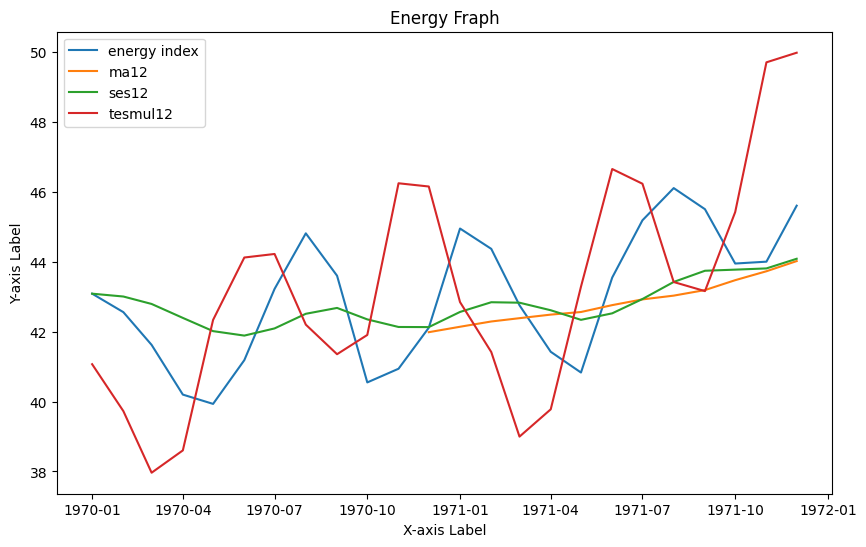

In [12]:
plt.figure(figsize=(10, 6))

# Plotting three separate line graphs
plt.plot(df.index[:24], df['EnergyIndex'].iloc[:24], label="energy index")
plt.plot(df.index[:24], df['SMA12'][:24] , label="ma12")
plt.plot(df.index[:24], df['ses12'][:24], label="ses12")
# plt.plot(df.index[:24], df['DESadd12'][:24], label="desadd12")
# plt.plot(df.index[:24], df['DESmul12'][:24], label="desmul12")
plt.plot(df.index[:24], df['TESmul12'][:24], label="tesmul12")


# Adding labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Energy Fraph')

plt.legend()

# Showing the plot
plt.show()

In [27]:
print(df['EnergyIndex'].iloc[:14])

DATE
1970-01-01    43.0869
1970-02-01    42.5577
1970-03-01    41.6215
1970-04-01    40.1982
1970-05-01    39.9321
1970-06-01    41.1847
1970-07-01    43.2230
1970-08-01    44.8138
1970-09-01    43.6007
1970-10-01    40.5467
1970-11-01    40.9385
1970-12-01    42.1117
1971-01-01    44.9517
1971-02-01    44.3696
Freq: MS, Name: EnergyIndex, dtype: float64


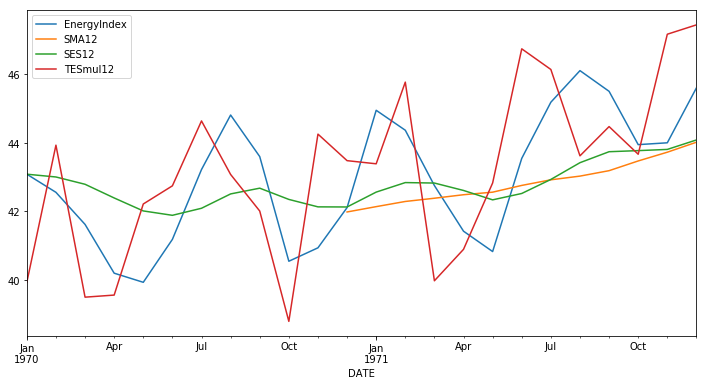

In [7]:
# DON'T WRITE HERE

### BONUS QUESTION: There is a visible decline in the Industrial Production Index around 1982-1983.<br>Why do you think this might be?

## Great job!